In [1]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def errors(n, r=1):
    
    mesh = UnitSquareMesh(n, n)

    # start by solving for u using non-hybrid CG
    V = FunctionSpace(mesh, 'CG', r)
    bcs = [DirichletBC(V, Constant(0), DomainBoundary())]

    u = TrialFunction(V)
    v = TestFunction(V)
    a = inner(grad(u), grad(v))*dx
    f = Expression("2*pow(pi,2)*sin(pi*x[0])*sin(pi*x[1])", degree=r+3)
    L = f*v*dx

    u = Function(V)
    solve(a == L, u, bcs)

    neg_grad_u = project(-grad(u), VectorFunctionSpace(mesh, "DG", r-1))
    
    # post-process to get s
    S_element = FiniteElement('BDM', mesh.ufl_cell(), r+3)
    V_dg_element = FiniteElement('DG', mesh.ufl_cell(), r)
    W = FunctionSpace(mesh, S_element*V_dg_element)
    s, lam = TrialFunctions(W)
    t, v = TestFunctions(W)
    a = (inner(s, t) + inner(div(s), div(t)) + div(lam*t + s*v) + 1e-10*inner(lam,v))*dx
    L = (f*(div(t) + v) + inner(neg_grad_u, t + grad(v)))*dx
    
    w = Function(W)
    solve(a == L, w)
    s = w.sub(0)

    # exact solutions
    u_exact = Expression("sin(pi*x[0])*sin(pi*x[1])", degree=r+3)
    s_exact = Expression(("-pi*cos(pi*x[0])*sin(pi*x[1])","-pi*sin(pi*x[0])*cos(pi*x[1])"), degree=r+5)

    u_error = errornorm(u_exact, u)
    grad_u_error = errornorm(s_exact, neg_grad_u)
    s_error = errornorm(s_exact, s)

    return u_error, grad_u_error, s_error

In [3]:
ns = [2**k for k in range(1,6)]
es = [errors(n, r=1) for n in ns]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/astern/miniconda3/envs/fenics/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


Text(0, 0.5, 'error')

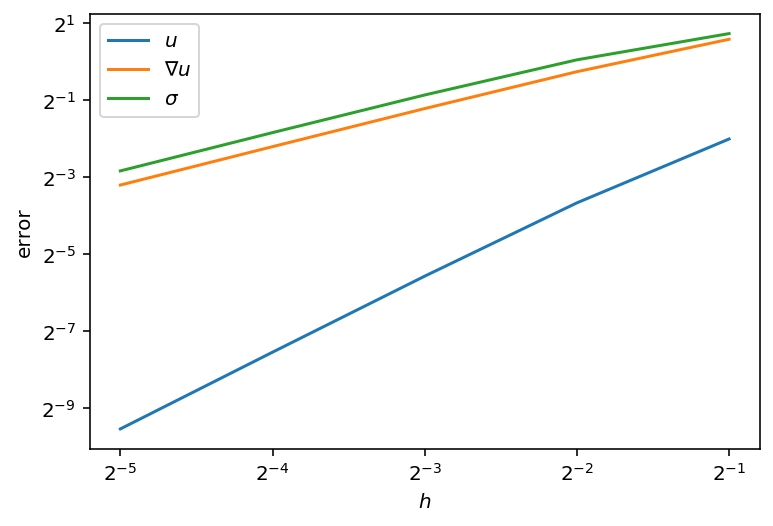

In [4]:
plt.loglog(1/np.array(ns), es, basex=2, basey=2)
plt.legend(['$u$',r'$\nabla u$',r'$\sigma$'])
plt.xlabel('$h$')
plt.ylabel('error')

In [5]:
rates = -np.diff(np.log2(es), axis=0)
rates

array([[1.6587235 , 0.84219983, 0.68131146],
       [1.90373784, 0.9576556 , 0.91313564],
       [1.97449092, 0.98910953, 0.97749541],
       [1.99349257, 0.99725414, 0.99432306]])